In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/BME-574-2024`


In [2]:
Pkg.add(["Plots","Distributions","Optimization","OptimizationOptimJL","Statistics"])

    Updating registry at `~/.julia/registries/JuliaComputingRegistry.toml`
    Updating registry at `~/.julia/registries/JuliaHubRegistry.toml`
   Resolving package versions...
  No Changes to `~/Documents/programming/BME-574-2024/Project.toml`
  No Changes to `~/Documents/programming/BME-574-2024/Manifest.toml`


In [3]:
using Plots, Distributions, Optimization, OptimizationOptimJL, Statistics

In [4]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [0.2, 0.5, 0.3, 3.5, 1.0, 1.5,1.8,2.0,2.3,2.2]

10-element Vector{Float64}:
 0.2
 0.5
 0.3
 3.5
 1.0
 1.5
 1.8
 2.0
 2.3
 2.2

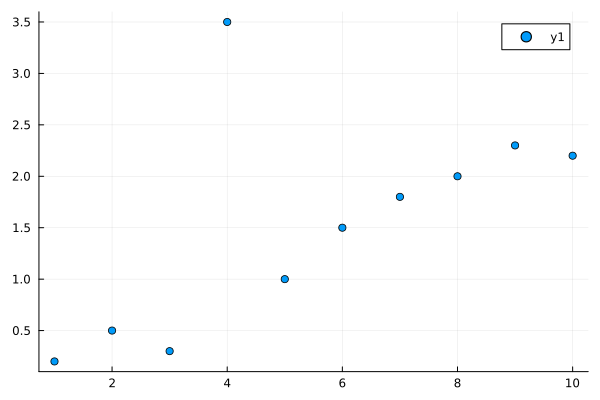

In [5]:
scatter(x,y)

In [6]:
function loss2(u, p)
    return sum((y .- u[2] .* x .- u[1]).^2)
end

loss2 (generic function with 1 method)

In [16]:
function loss1(u, p)
    return sum(abs.(y .- u[2] .* x .- u[1]))
end

loss1 (generic function with 1 method)

In [17]:
function lossmax(u, p)
    return maximum(abs.(y .- u[2] .* x .- u[1]))
end

lossmax (generic function with 1 method)

In [18]:
lossmax([0,0],[])

3.5

In [9]:
u0 = [0.0, 0.0]

2-element Vector{Float64}:
 0.0
 0.0

In [10]:
optf = OptimizationFunction(loss2)
prob = OptimizationProblem(optf, u0, [])

┌ Warning: Using arrays or dicts to store parameters of different types can hurt performance.
│ Consider using tuples instead.
└ @ SciMLBase ~/.julia/packages/SciMLBase/EiBzT/src/performance_warnings.jl:33


OptimizationProblem. In-place: true
u0: 2-element Vector{Float64}:
 0.0
 0.0

In [11]:
sol = solve(prob, Optim.NelderMead())

retcode: Success
u: 2-element Vector{Float64}:
 0.380021723450345
 0.20908833333192411

In [12]:
sol.original

 * Status: success

 * Candidate solution
    Final objective value:     6.234182e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    42
    f(x) calls:    81


In [14]:
y_fit = sol.u[2] .* x .+ sol.u[1]

10-element Vector{Float64}:
 0.5891100567822691
 0.7981983901141932
 1.0072867234461174
 1.2163750567780416
 1.4254633901099658
 1.6345517234418896
 1.8436400567738138
 2.052728390105738
 2.2618167234376623
 2.4709050567695865

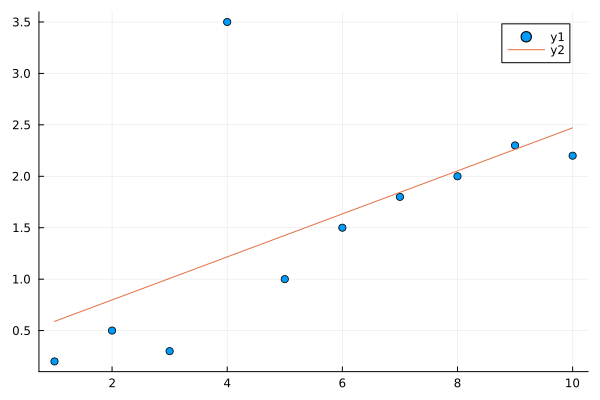

In [15]:
scatter(x,y)
plot!(x,y_fit)

In [19]:
optf = OptimizationFunction(loss1)
prob = OptimizationProblem(optf, u0, [])
sol1 = solve(prob, Optim.NelderMead())

retcode: Success
u: 2-element Vector{Float64}:
 -0.05999985073063675
  0.25999996177689166

In [20]:
optf = OptimizationFunction(lossmax)
prob = OptimizationProblem(optf, u0, [])
solmax = solve(prob, Optim.NelderMead())

retcode: Success
u: 2-element Vector{Float64}:
 0.9500002042443974
 0.27142851164366755

In [21]:
y_fit1 = sol1.u[2] .* x .+ sol1.u[1]
y_fitmax = solmax.u[2] .* x .+ solmax.u[1]

10-element Vector{Float64}:
 1.2214287158880648
 1.4928572275317324
 1.7642857391754
 2.0357142508190673
 2.3071427624627354
 2.5785712741064026
 2.84999978575007
 3.121428297393738
 3.392856809037405
 3.6642853206810733

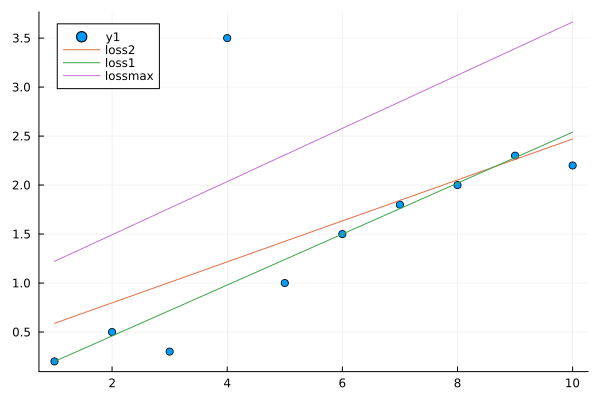

In [22]:
scatter(x,y)
plot!(x,y_fit,label="loss2")
plot!(x,y_fit1, label="loss1")
plot!(x,y_fitmax, label="lossmax")